In [15]:
import os
import sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
grandgrandparentdir = os.path.dirname(os.path.dirname(os.path.dirname(currentdir)))
sys.path.insert(0,grandgrandparentdir) 
import pickle
import numpy as np
import tqdm
import det3d
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Visualize the 3d plot of the dimensions
## Objectives
1. To understand if we could locate any smaller clusters within the class 'CAR'

In [11]:
print("Current Directory: ", currentdir)
print("Grand Grand Parent Directory: ", grandgrandparentdir)
dataset_path = '/media/data3/tjtanaa/kitti_dataset'
database_path = os.path.join(dataset_path, "gt_database")
classes=['Car']
pkl_file_name = os.path.join(database_path, '%s_gt_database_level_%s.pkl' % ('train', '-'.join(classes)))

# save to current directory
dimensions_numpyfile = os.path.join(currentdir, '%s_dimensions_np.npy' % ('-'.join(classes)))
dimensions_np = np.load(dimensions_numpyfile)

Current Directory:  /home/tan/tjtanaa/det3d/det3d/experimental_analysis/kitti_dataset_analysis
Grand Grand Parent Directory:  /home/tan/tjtanaa/det3d


In [16]:
print(dimensions_np.shape)
dimensions_df = pd.DataFrame(dimensions_np,
                   columns=['h', 'w', 'l'])

(11017, 3)


In [17]:
print(dimensions_df)

          h     w     l
0      1.57  1.73  4.15
1      1.61  1.66  3.20
2      1.61  1.66  3.20
3      1.43  1.70  3.95
4      1.51  1.60  3.24
...     ...   ...   ...
11012  1.47  1.68  3.88
11013  1.46  1.74  3.99
11014  1.42  1.68  4.29
11015  1.36  1.40  3.80
11016  1.44  1.65  2.96

[11017 rows x 3 columns]


In [36]:
print(dimensions_df[(dimensions_df['l']>2.7)])

          h     w     l
0      1.57  1.73  4.15
1      1.61  1.66  3.20
2      1.61  1.66  3.20
3      1.43  1.70  3.95
4      1.51  1.60  3.24
...     ...   ...   ...
11012  1.47  1.68  3.88
11013  1.46  1.74  3.99
11014  1.42  1.68  4.29
11015  1.36  1.40  3.80
11016  1.44  1.65  2.96

[10938 rows x 3 columns]


In [41]:
print(dimensions_df[(dimensions_df['h']>2)])

          h     w     l
119    2.05  1.50  3.83
163    2.04  1.99  4.82
172    2.04  1.66  4.62
276    2.04  1.66  4.62
291    2.04  1.99  4.82
...     ...   ...   ...
10426  2.48  1.81  4.73
10707  2.04  1.66  4.62
10800  2.48  1.81  4.73
10904  2.04  1.99  4.82
10966  2.48  1.81  4.73

[117 rows x 3 columns]


<IPython.core.display.Javascript object>


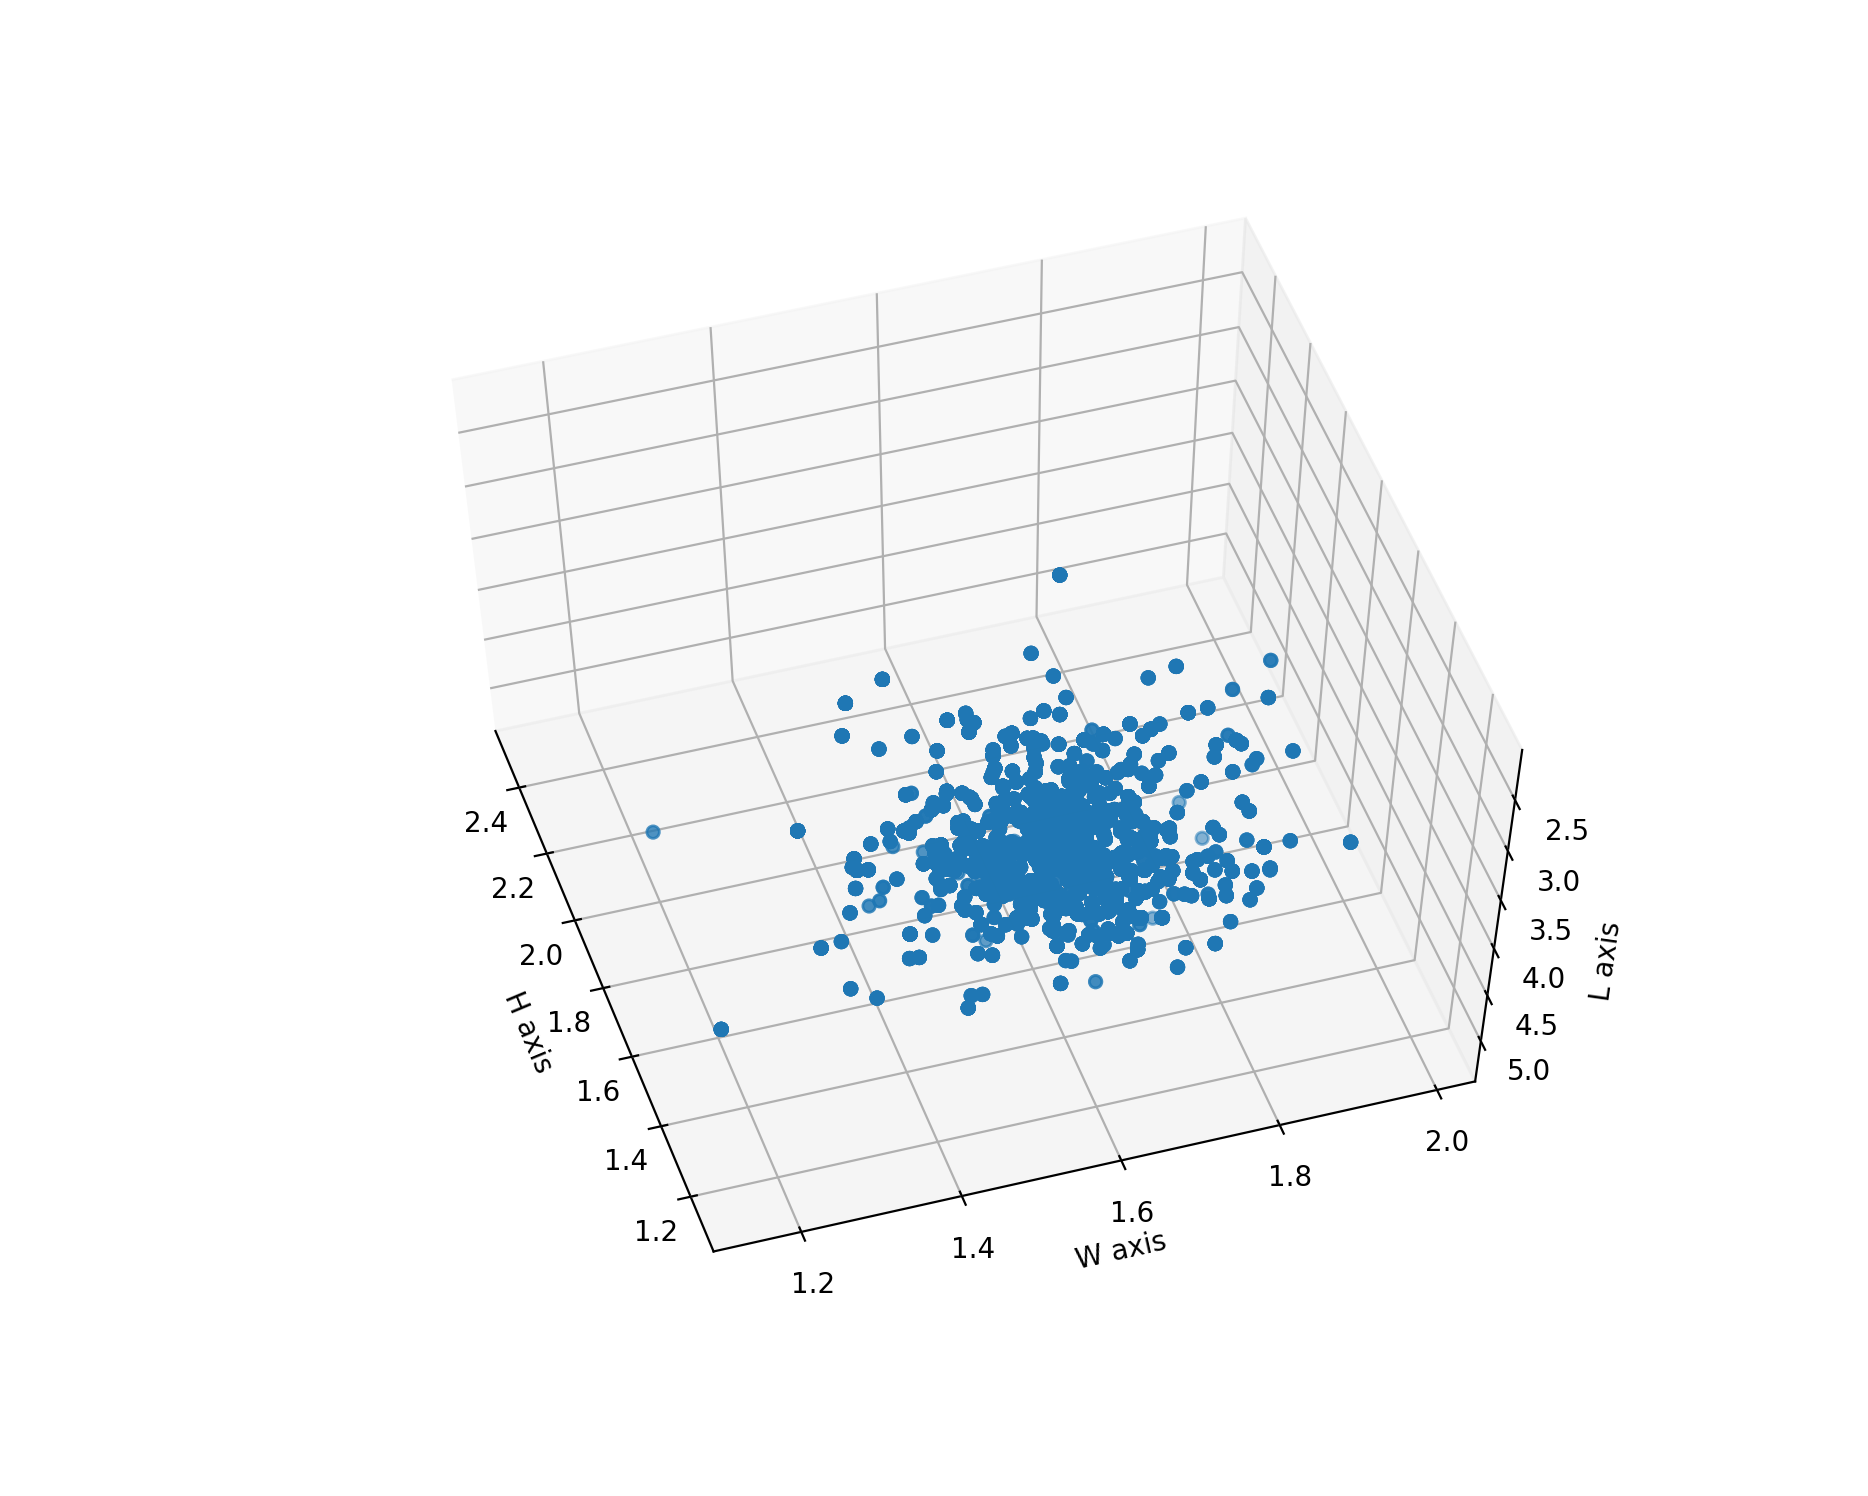

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dimensions_np[:, 0], dimensions_np[:, 1], dimensions_np[:,2])
ax.set_xlabel('H axis')
ax.set_ylabel('W axis')
ax.set_zlabel('L axis')
plt.show()